In [77]:
from torch.utils.data import DataLoader
# from timesformer_pytorch import TimeSformer
import pandas as pd
import torch

from utils.datasets import StronglyLabelledDataset

**Loading dataset**

In [78]:
dataset = StronglyLabelledDataset('train')

**Loading TimeSformer Model**

In [79]:
# Just to define TimeSformer's config -- I don't actually need this for now
df = pd.read_json('data/ontology.json')
df = df[['id','name']]

num_classes = len(df)

In [95]:
from transformers import TimesformerForVideoClassification

model = TimesformerForVideoClassification.from_pretrained(
    'facebook/timesformer-base-finetuned-k400',
    num_labels=num_classes,
    ignore_mismatched_sizes=True
)

model.config.output_hidden_states = True
model.config.num_frames = 32

Some weights of TimesformerForVideoClassification were not initialized from the model checkpoint at facebook/timesformer-base-finetuned-k400 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([400, 768]) in the checkpoint and torch.Size([632, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([400]) in the checkpoint and torch.Size([632]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [81]:
model.eval()

TimesformerForVideoClassification(
  (timesformer): TimesformerModel(
    (embeddings): TimesformerEmbeddings(
      (patch_embeddings): TimesformerPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (time_drop): Dropout(p=0.0, inplace=False)
    )
    (encoder): TimesformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x TimesformerLayer(
          (drop_path): Identity()
          (attention): TimeSformerAttention(
            (attention): TimesformerSelfAttention(
              (qkv): Linear(in_features=768, out_features=2304, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
            )
            (output): TimesformerSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): TimesformerIntermediate(
            (dense

**Making inference with one example to get (second to) last layer embeddings (size = 768)** 

In [72]:
example_idx = 10

video, audio, metadata = dataset[example_idx]

video = video[:128] # Select 128 frames

## add batch dimension
video = video.unsqueeze(0)
# video = video.to(model.device)
# video = video.to(dtype=torch.float32)
print(f"Final video shape: {video.shape}")

c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([301, 720, 1280, 3])
torch.Size([301, 3, 720, 1280])
Final video shape: torch.Size([1, 128, 3, 224, 224])


In [73]:
with torch.no_grad():
    outputs = model(video)

# All 12 layers' hidden states
hidden_states = outputs.hidden_states

# Second to last layer embeddings
last_layer_embeddings = hidden_states[-2]

In [74]:
last_layer_embeddings.shape

torch.Size([1, 25089, 768])

This is a matrix because it is the full sequence for each frame of the video. The size of the rows is indeed equivalent to number of patches * number of frames

In [75]:
128 * (224*224) / (16*16)

25088.0

We can pool it to get a 768 dimensional vector (representing the entire video)

In [76]:
pooled_embedding = last_layer_embeddings.mean(dim=1)

pooled_embedding.shape

torch.Size([1, 768])

**One Batch**

In [109]:
batch_size = 30

# videos, audios, metadatas = [], [], []

for idx in range(10, batch_size):
    video, audio, metadata = dataset[idx]
    videos.append(video)
    audios.append(audio)
    metadatas.append(metadata)

c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([301, 720, 1280, 3])
torch.Size([301, 3, 720, 1280])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 360, 480, 3])
torch.Size([300, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 360, 640, 3])
torch.Size([300, 3, 360, 640])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([301, 720, 1280, 3])
torch.Size([301, 3, 720, 1280])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 720, 1280, 3])
torch.Size([300, 3, 720, 1280])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([234, 720, 1280, 3])
torch.Size([234, 3, 720, 1280])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([250, 360, 640, 3])
torch.Size([250, 3, 360, 640])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 360, 480, 3])
torch.Size([300, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 360, 480, 3])
torch.Size([300, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 360, 480, 3])
torch.Size([300, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 360, 480, 3])
torch.Size([300, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([270, 360, 480, 3])
torch.Size([270, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 360, 480, 3])
torch.Size([300, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 720, 1280, 3])
torch.Size([300, 3, 720, 1280])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([190, 226, 400, 3])
torch.Size([190, 3, 226, 400])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 240, 320, 3])
torch.Size([300, 3, 240, 320])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([149, 352, 640, 3])
torch.Size([149, 3, 352, 640])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([271, 360, 480, 3])
torch.Size([271, 3, 360, 480])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([284, 360, 270, 3])
torch.Size([284, 3, 360, 270])


c:\Users\giorg\Projects\Adorno\Visually-Indicated-Sounds\second_venv\lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([300, 720, 960, 3])
torch.Size([300, 3, 720, 960])


In [110]:
# len(videos)
for i in range(len(videos)):
    videos[i] = videos[i][:32]

videos_t = torch.stack(videos, dim=0)

In [114]:
videos_t[10:].shape

torch.Size([20, 32, 3, 224, 224])

In [115]:
with torch.no_grad():
    outputs = model(videos_t[10:])

# All 12 layers' hidden states
hidden_states = outputs.hidden_states

# Second to last layer embeddings
last_layer_embeddings = hidden_states[-2]
pooled_embedding = last_layer_embeddings.mean(dim=1)

In [113]:
pooled_embedding_first = pooled_embedding
pooled_embedding_first.shape

torch.Size([10, 768])

In [117]:
pooled_embedding.shape

torch.Size([20, 768])

In [121]:
pooled_embedding_batch = torch.cat((pooled_embedding_first, pooled_embedding), dim=0)

**Visualizing the embeddings**

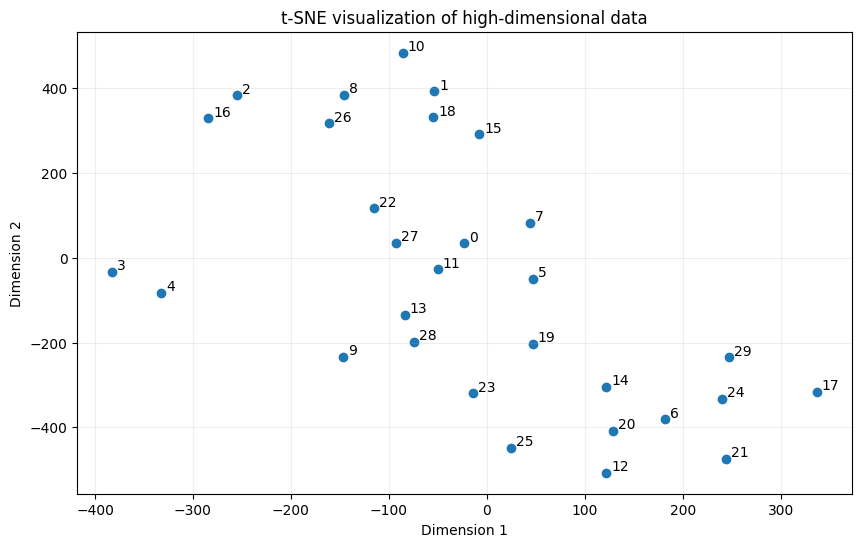

In [135]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = pooled_embedding_batch.numpy()

tsne = TSNE(n_components=2, perplexity=5, learning_rate=200.0, random_state=42)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE visualization of high-dimensional data')
for i, point in enumerate(X_2d):
    plt.annotate(i, (point[0] + 5, point[1] + 5))

plt.grid(True, alpha=0.2)
plt.show()